<a href="https://colab.research.google.com/github/akkiyolo/pytorch/blob/main/02_autograd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autograd: Autograd is PyTorch’s automatic-differentiation engine: it builds a dynamic computation graph while you run forward code, then—when you call .backward()—it automatically computes gradients of every tensor that has requires_grad=True by reverse-mode (back-prop) differentiation.

In [1]:
import torch

In [4]:
x=torch.randn(3,requires_grad=True)
print(x)

tensor([-1.8031, -0.7696, -0.9516], requires_grad=True)


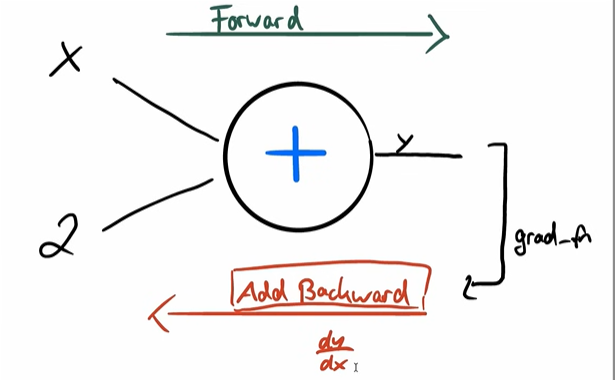

In [8]:
y=x+2 # operation is plus so it says add backward
y

tensor([0.1969, 1.2304, 1.0484], grad_fn=<AddBackward0>)

In [10]:
z=y*y*2 # operation is * so it says multiply backward
z

tensor([0.0775, 3.0279, 2.1982], grad_fn=<MulBackward0>)

In [11]:
z=z.mean() # prints the mean backward
z

tensor(1.7679, grad_fn=<MeanBackward0>)

What is Backpropagation?
- Backpropagation (short for "backward propagation of errors") is the core algorithm used to train neural networks. It’s how a neural network learns from its mistakes by adjusting millions (or billions) of weights to minimize prediction error.

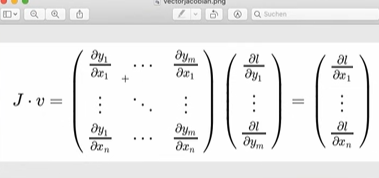

In [12]:
z.backward() # dz/dx
print(x.grad)

tensor([0.2625, 1.6406, 1.3978])


In [13]:
# how does it prevent pytorch from tracking the history and calculating the grad_fn attribute

# options:
'''
x.requires_grad_(False)
x.detach()
with torch.no_grad():
'''
x=torch.randn(3, requires_grad=True)
print(x)
x.requires_grad_(False)
print(x)

tensor([1.2036, 0.8351, 0.2650], requires_grad=True)
tensor([1.2036, 0.8351, 0.2650])


In [14]:
y=x.detach()
print(y)

tensor([1.2036, 0.8351, 0.2650])


In [22]:
with torch.no_grad():
  y=x+2
  print(y)

tensor([1.3062, 3.8040, 3.2404])


In [24]:
## dummy training example

weights=torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output=(weights*3).sum()

  model_output.backward()

  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
